In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# Loading Dataset
df = pd.read_csv("train.csv")

# Some basic stats on the target variable
print('# startup failed = {}'.format(len(df[df['failure'] == 1])))
print('# startup succeed = {}'.format(len(df[df['failure'] == 0])))
print('% startup failed = {}%'.format(round(float(len(df[df['failure'] == 1])) / len(df) * 100), 3))

df.apply(lambda x: sum(x.isnull()), axis=0)

# startup failed = 1309
# startup succeed = 4935
% startup failed = 21%


index      0
attr1      0
attr2      0
attr3      0
attr4      0
attr5      0
attr6      0
attr7      0
attr8      0
attr9      0
attr10     0
attr11     0
attr12     0
attr13     0
attr14     0
attr15     0
attr16     0
attr17     0
attr18     0
attr19     0
attr20     0
failure    0
dtype: int64

<AxesSubplot:>

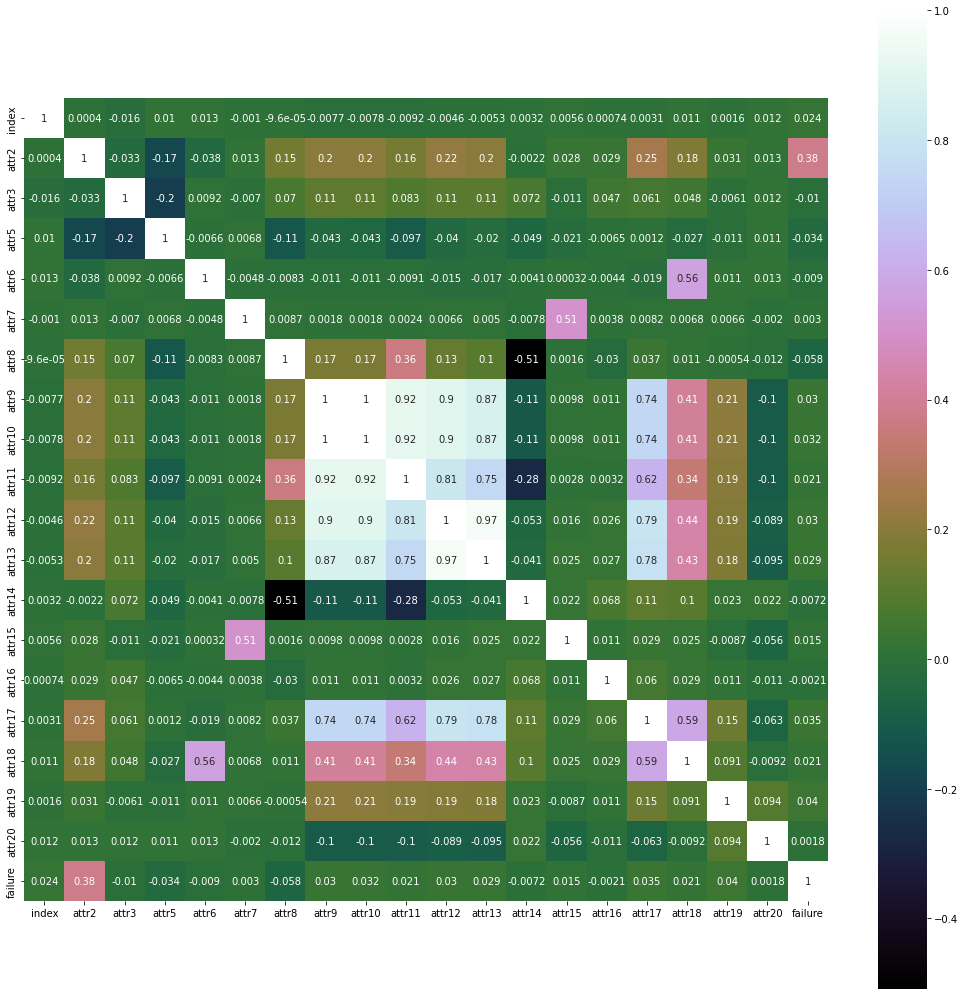

In [ ]:
correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

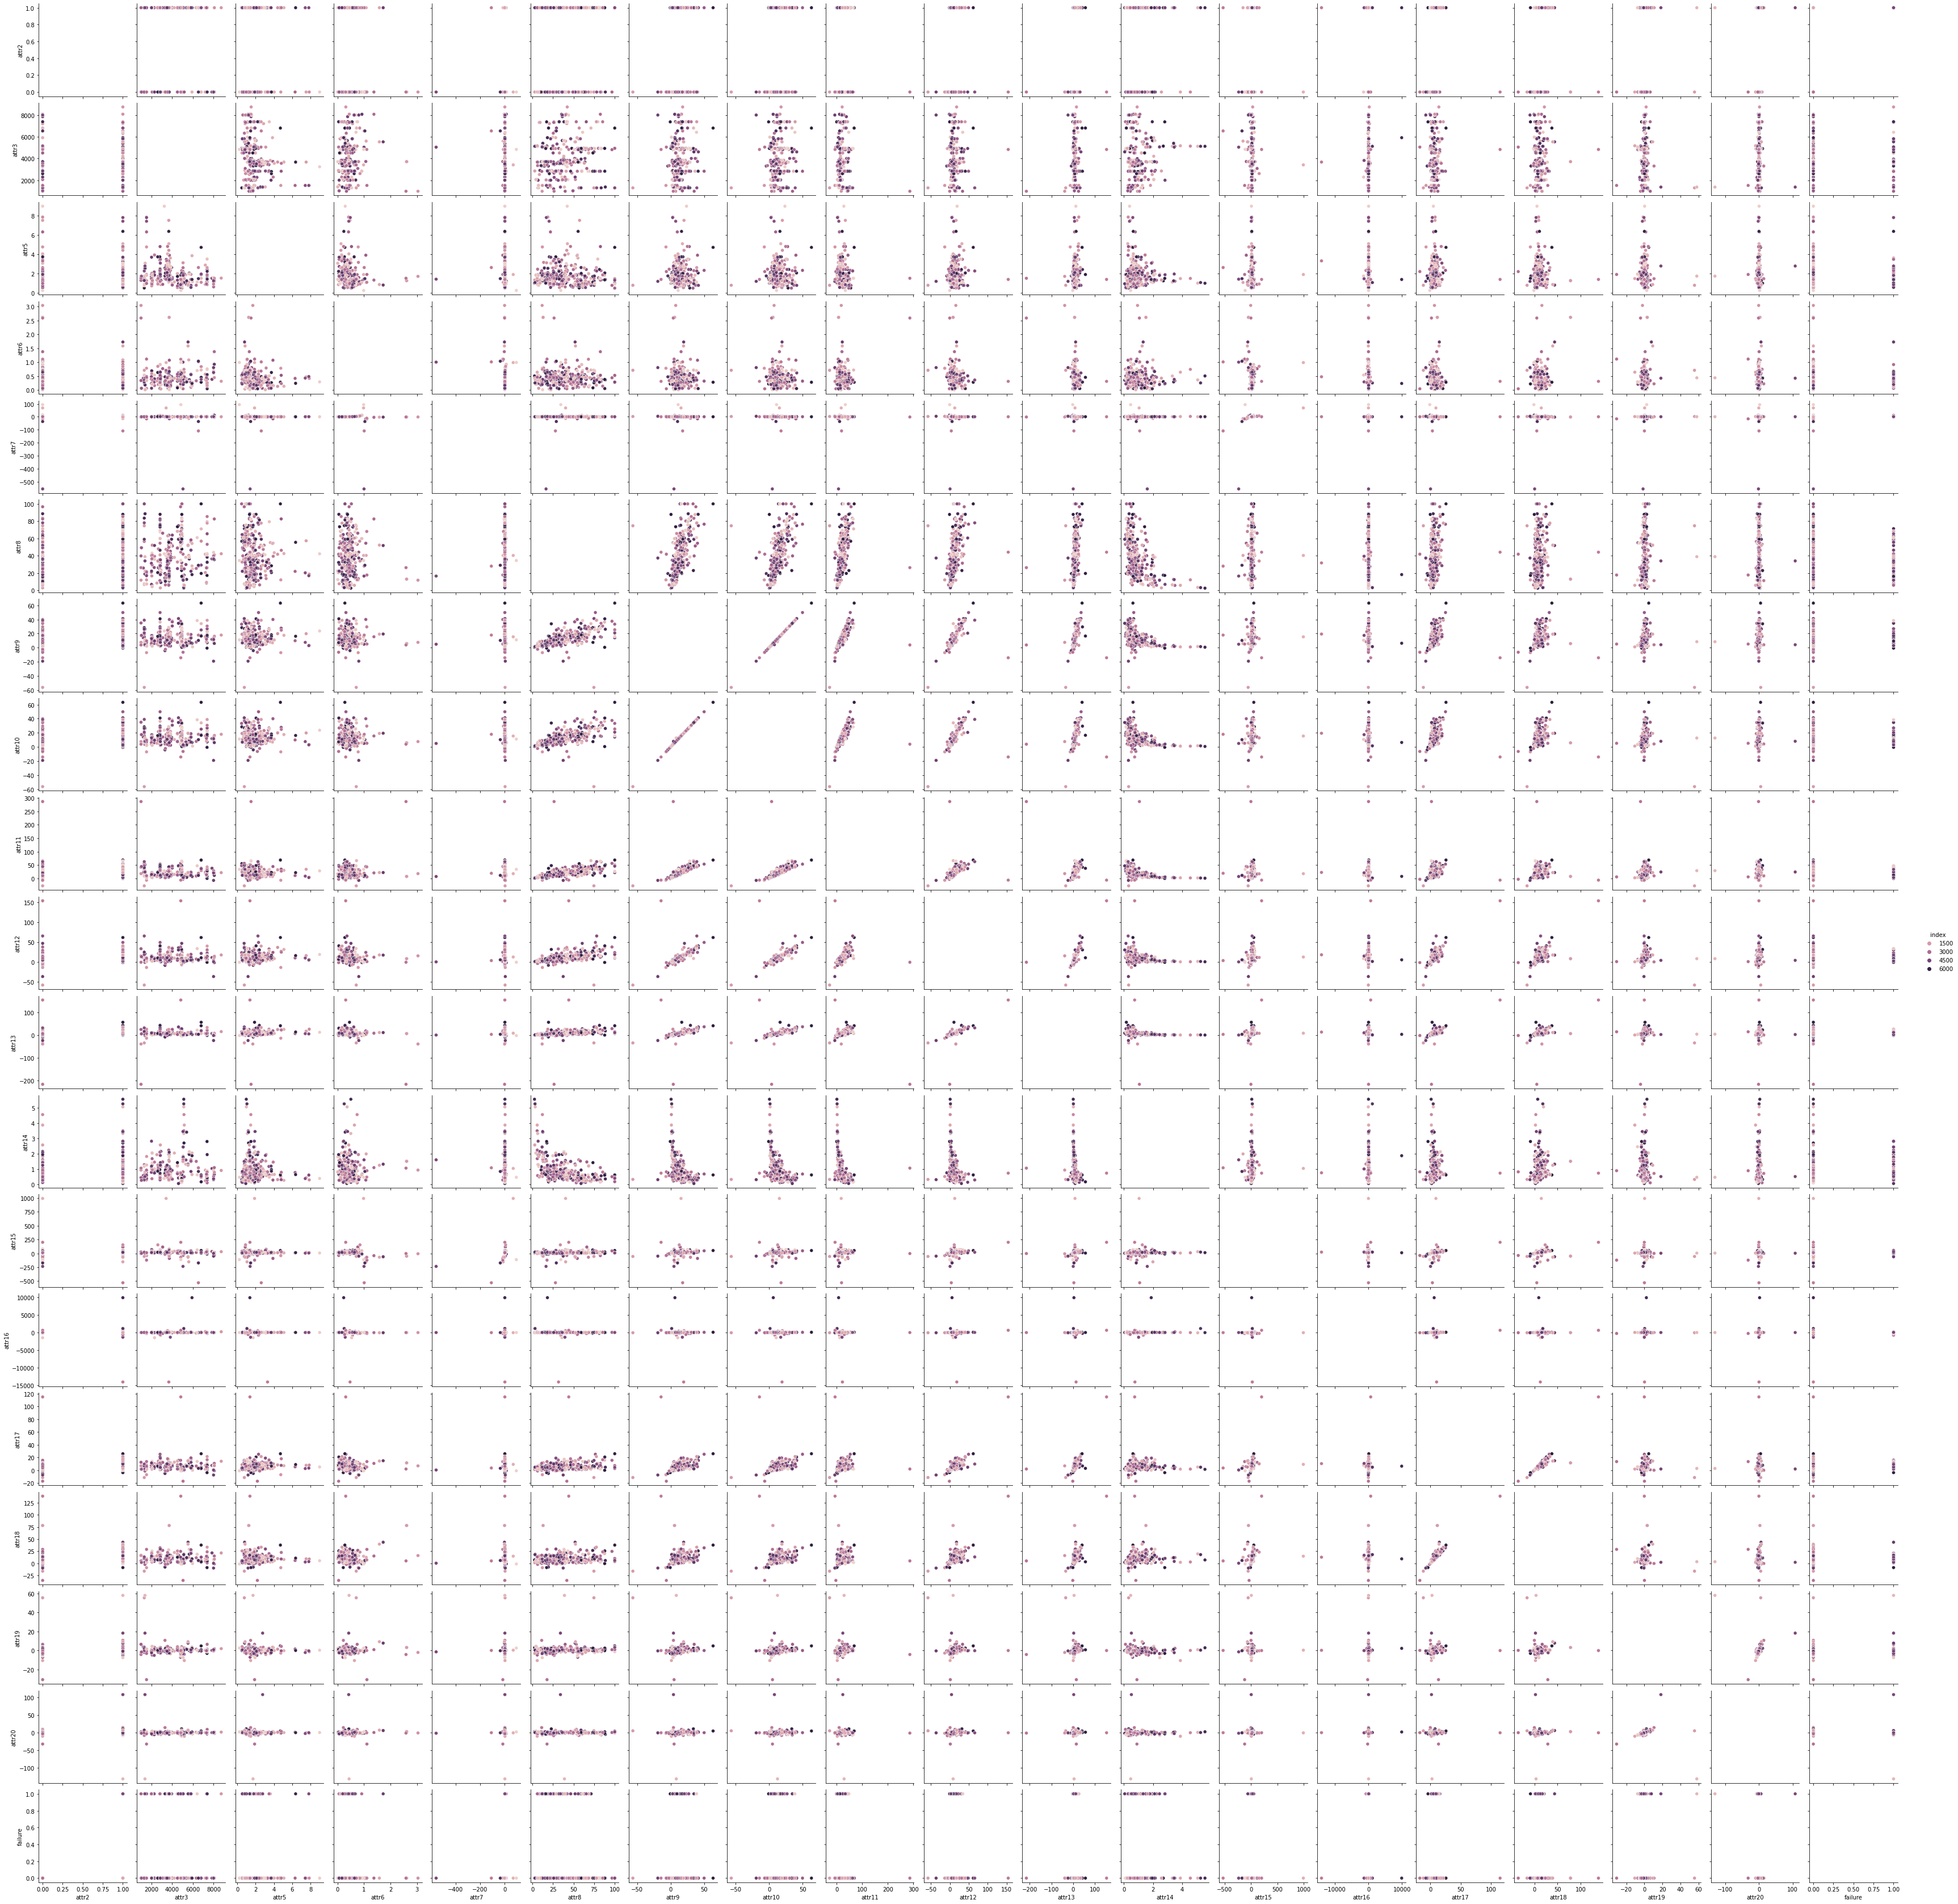

In [ ]:
# # take a 5% sample as this is computationally expensive
df_sample = df.sample(frac=0.05)
# # Pairwise plots
pplot = sns.pairplot(df_sample, hue="index")

In [ ]:
df.attr1.unique()
# df.attr4.unique()

# Prepend string prior to encoding
df['attr1'] = '1_' + df['attr1'].astype(str)
df['attr4'] = '4_' + df['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(df['attr1'])
df = df.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(df['attr4'])
df = df.join(one_hot_attr4)

In [ ]:
pd.set_option('display.max_columns', None)
# 19, 20, 14, 9
df = df.drop(['index', 'attr1', 'attr4', 'attr10', 'attr13', 'attr15', 'attr19', 'attr20'], axis=1)

In [ ]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.8*len(df)), int(1*len(df))])
print(train.shape, test.shape, validate.shape)

# Separate target and predictors
y_train = df['failure']
x_train = df.drop(['failure'], axis=1)
y_test = test['failure']
x_test = test.drop(['failure'], axis=1)
y_validate = validate['failure']
x_validate = validate.drop(['failure'], axis=1)

print(y_test.mean())
print(y_train.mean())

(4995, 33) (1249, 33) (0, 33)
0.20256204963971178
0.20964125560538116


In [ ]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

Features sorted by their score:
[(0.1381, 'attr2'), (0.0729, 'attr5'), (0.0636, 'attr12'), (0.0624, 'attr8'), (0.0599, 'attr18'), (0.0595, 'attr9'), (0.0588, 'attr17'), (0.0571, 'attr11'), (0.0564, 'attr7'), (0.0563, 'attr6'), (0.0557, 'attr14'), (0.0542, 'attr3'), (0.0526, 'attr16'), (0.0315, '1_B'), (0.0263, '1_G'), (0.0204, '1_F'), (0.0099, '1_C'), (0.0076, '4_A'), (0.0066, '4_I'), (0.0064, '4_H'), (0.0059, '4_B'), (0.0058, '4_E'), (0.0051, '4_L'), (0.0051, '4_K'), (0.0051, '4_J'), (0.0048, '4_F'), (0.0036, '4_G'), (0.0033, '4_D'), (0.0025, '4_C'), (0.0016, '1_A'), (0.0008, '1_E'), (0.0001, '1_D')]


In [ ]:
# Instantiate
rf = RandomForestClassifier()    
# Fit
rf_model = rf.fit(x_train, y_train)
# training accuracy 99.74%
rf_model.score(x_train, y_train)

0.9804612427930813

In [ ]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

In [ ]:
# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

print(rf_f1)

0.9480000000000001


In [ ]:
asm_test = pd.read_csv('assignment-test.csv')

# Prepend string prior to encoding
asm_test['attr1'] = '1_' + asm_test['attr1'].astype(str)
asm_test['attr4'] = '4_' + asm_test['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(asm_test['attr1'])
asm_test = asm_test.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(asm_test['attr4'])
asm_test = asm_test.join(one_hot_attr4)

pd.set_option('display.max_columns', None)
asm_test.head()

asm_test = asm_test.drop(['index', 'attr1', 'attr4', 'attr10', 'attr13', 'attr15', 'attr19', 'attr20'], axis=1)

In [ ]:
# prediction = pd.DataFrame(rf_model.predict(asm_test))
# print(prediction.describe())

# prediction.to_csv("submission_randomForest.csv")



                 0
count  1561.000000
mean      0.170404
std       0.376107
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
